# Edit distance (Levenshtein distance)

__Zadanie dotyczy wykorzystania odległości edycyjnej.__

1. Zaimplementuj algorytm obliczania odległości edycyjnej w taki sposób, aby możliwe było określenie przynajmniej jednej sekwencji edycji (dodanie, usunięcie, zmiana znaku), która pozwala w minimalnej liczbie kroków, przekształcić jeden łańcuch w drugi.
2. Na podstawie poprzedniego punktu zaimplementuj prostą wizualizację działania algorytmu, poprzez wskazanie kolejnych wersji pierwszego łańcucha, w których dokonywana jest określona zmiana. "Wizualizacja" może działać w trybie tekstowym. Np. zmiana łańcuch "los" w "kloc" może być zrealizowana następująco:
  1. *k*los (dodanie litery k)
  2. klo*c* (zamiana s->c)
3. Przedstaw wynik działania algorytmu z p. 2 dla następujących par łańcuchów:
  1. los - kloc
  2. Łódź - Lodz
  3. kwintesencja - quintessence
  4. ATGAATCTTACCGCCTCG - ATGAGGCTCTGGCCCCTG
4. Zaimplementuj algorytm obliczania najdłuższego wspólnego podciągu dla pary ciągów elementów.
5. Korzystając z gotowego tokenizera (np spaCy - https://spacy.io/api/tokenizer) dokonaj podziału załączonego tekstu na tokeny.
6. Stwórz 2 wersje załączonego tekstu, w których usunięto 3% losowych tokenów.
7. Oblicz długość najdłuższego podciągu wspólnych tokenów dla tych tekstów.
8. Korzystając z algorytmu z punktu 4 skonstruuj narzędzie, o działaniu podobnym do narzędzia diff, tzn. wskazującego w dwóch plikach linie, które się różnią. Na wyjściu narzędzia powinny znaleźć się elementy, które nie należą do najdłuższego wspólnego podciągu. Należy wskazać skąd dana linia pochodzi (< > - pierwszy/drugi plik) oraz numer linii w danym pliku.
9. Przedstaw wynik działania narzędzia na tekstach z punktu 6. Zwróć uwagę na dodanie znaków przejścia do nowej linii, które są usuwane w trakcie tokenizacji.

---

In [1]:
import numpy as np

1. Zaimplementuj algorytm obliczania odległości edycyjnej w taki sposób, aby możliwe było określenie przynajmniej jednej sekwencji edycji (dodanie, usunięcie, zmiana znaku), która pozwala w minimalnej liczbie kroków, przekształcić jeden łańcuch w drugi.

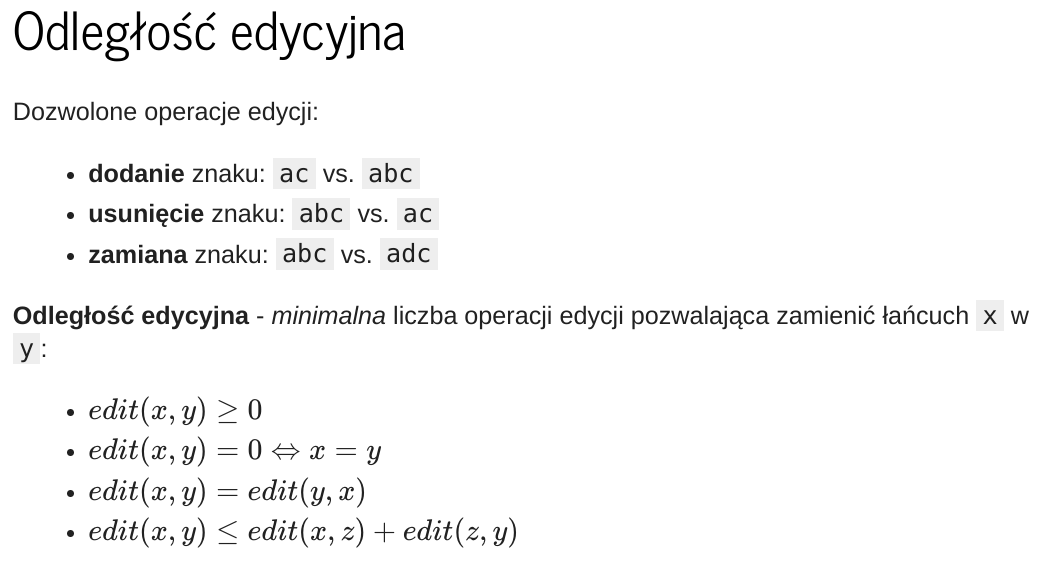

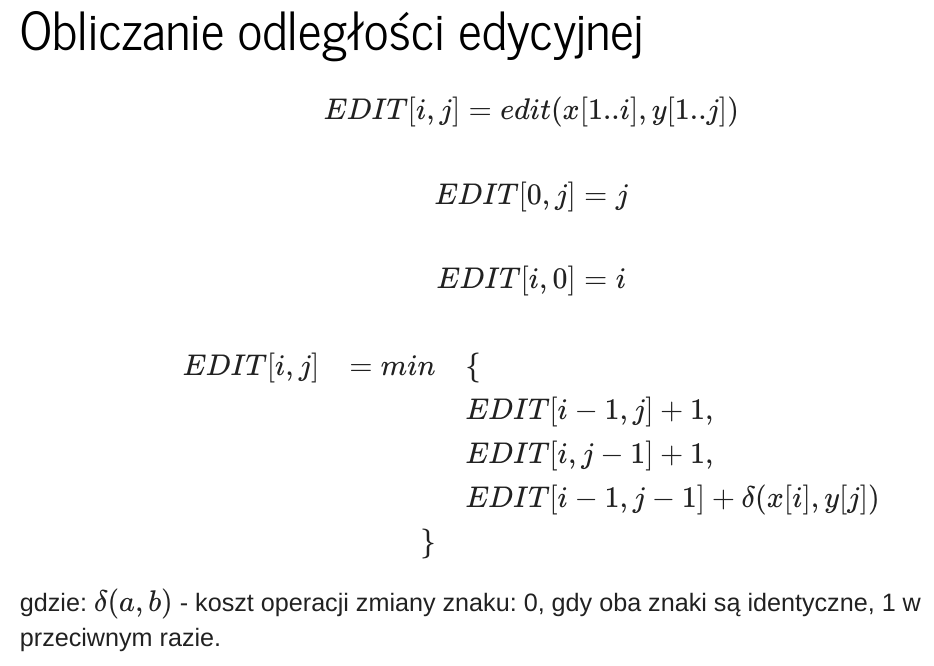

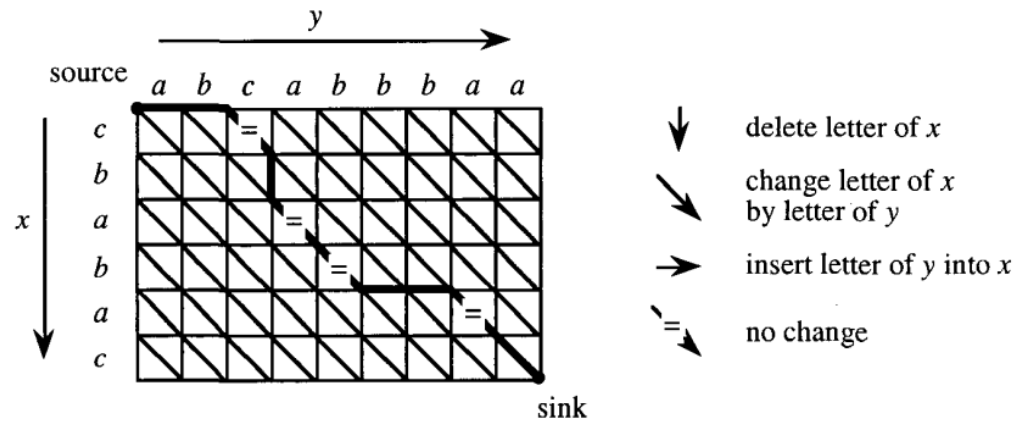

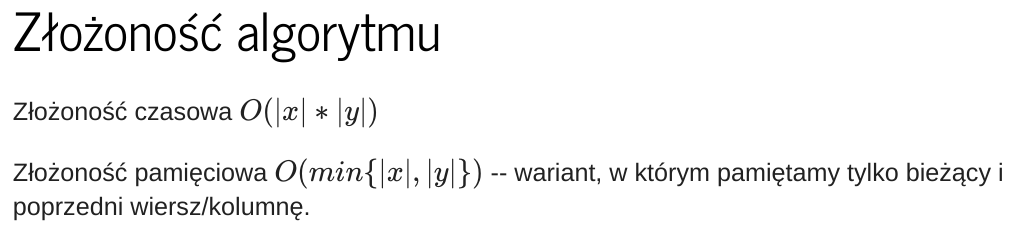

In [2]:
def delta1(a, b):
    if a == b:
        return 0
    return 1


def edit_distance(x, y, delta):
    edit_table = np.empty((len(x) + 1, len(y) + 1))
    for i in range(len(x) + 1):
        edit_table[i, 0] = i
    for i in range(len(y) + 1):
        edit_table[0, i] = i
    for i in range(len(x)):
        k = i + 1
        for j in range(len(y)):
            l = j + 1
            edit_table[k, l] = min(edit_table[k - 1, l] + 1,  # down
                                   edit_table[k, l - 1] + 1,  # right
                                   edit_table[k - 1, l - 1] + delta(x[i], y[j]))  # diagonal
    return edit_table

In [3]:
def get_edit_path(a, b, edit_table):
    operations = []
    positions = []
    na = len(a)
    nb = len(b)
    while na > 0 or nb > 0:
        if edit_table[na - 1][nb] + 1 == edit_table[na][nb]:
            operations.append("REMOVE")
            na -= 1
        elif edit_table[na][nb - 1] + 1 == edit_table[na][nb]:
            operations.append("INSERT")
            nb -= 1
        elif edit_table[na - 1][nb - 1] == edit_table[na][nb]:
            operations.append("NO CHANGE")
            na -= 1
            nb -= 1
        else:
            operations.append("REPLACE")
            na -= 1
            nb -= 1
        positions.append(nb)
    operations.reverse()
    positions.reverse()
    return operations, positions

2. Na podstawie poprzedniego punktu zaimplementuj prostą wizualizację działania algorytmu, poprzez wskazanie kolejnych wersji pierwszego łańcucha, w których dokonywana jest określona zmiana. "Wizualizacja" może działać w trybie tekstowym. Np. zmiana łańcuch "los" w "kloc" może być zrealizowana następująco:
  1. *k*los (dodanie litery k)
  2. klo*c* (zamiana s->c)

In [4]:
def visualize(a, b, edit_path):
    i = j = 0
    curr = 1
    print()
    for oper in edit_path:
        if oper == "INSERT":
            print(f"{str(curr)}. INSERT:  {a[:j]}[{b[j]}]{a[j:]}")
            a = a[:j] + b[j] + a[j:]
            print(f"now is:     {a}\n")
            curr += 1
        elif oper == "REMOVE":
            print(f"{str(curr)}. REMOVE:  {a[:i]}[{a[i]}]{a[i + 1:]}")
            a = a[:i] + a[i + 1:]
            print(f"now is:     {a}\n")
            curr += 1
            continue
        elif oper == "REPLACE":
            print(f"{str(curr)}. REPLACE: {a[:i]}[{a[i]}->{b[j]}]{a[i + 1:]}")
            a = a[:j] + b[j] + a[j + 1:]
            print(f"now is:     {a}\n")
            curr += 1
        i += 1
        j += 1

3. Przedstaw wynik działania algorytmu z p. 2 dla następujących par łańcuchów:
  1. los - kloc
  2. Łódź - Lodz
  3. kwintesencja - quintessence
  4. ATGAATCTTACCGCCTCG - ATGAGGCTCTGGCCCCTG

In [5]:
def tranfer_strings(a, b):
    edit_dist = edit_distance(a, b, delta1)
    print(f"Editing: {a} -> {b}")
    print(f"Editing distance is: {int(edit_dist[-1][-1])}")
    path = get_edit_path(a, b, edit_dist)[0]
    visualize(a, b, path)

In [6]:
a1 = "los"
b1 = "kloc"
tranfer_strings(a1, b1)

Editing: los -> kloc
Editing distance is: 2

1. INSERT:  [k]los
now is:     klos

2. REPLACE: klo[s->c]
now is:     kloc



In [7]:
a2 = "Łódź"
b2 = "Lodz"
tranfer_strings(a2, b2)

Editing: Łódź -> Lodz
Editing distance is: 3

1. REPLACE: [Ł->L]ódź
now is:     Lódź

2. REPLACE: L[ó->o]dź
now is:     Lodź

3. REPLACE: Lod[ź->z]
now is:     Lodz



In [8]:
a3 = "kwintesencja"
b3 = "quintessence"
tranfer_strings(a3, b3)

Editing: kwintesencja -> quintessence
Editing distance is: 5

1. REPLACE: [k->q]wintesencja
now is:     qwintesencja

2. REPLACE: q[w->u]intesencja
now is:     quintesencja

3. INSERT:  quintes[s]encja
now is:     quintessencja

4. REPLACE: quintessenc[j->e]a
now is:     quintessencea

5. REMOVE:  quintessence[a]
now is:     quintessence



In [9]:
a4 = "ATGAATCTTACCGCCTCG"
b4 = "ATGAGGCTCTGGCCCCTG"
tranfer_strings(a4, b4)

Editing: ATGAATCTTACCGCCTCG -> ATGAGGCTCTGGCCCCTG
Editing distance is: 7

1. REPLACE: ATGA[A->G]TCTTACCGCCTCG
now is:     ATGAGTCTTACCGCCTCG

2. REPLACE: ATGAG[T->G]CTTACCGCCTCG
now is:     ATGAGGCTTACCGCCTCG

3. INSERT:  ATGAGGCT[C]TACCGCCTCG
now is:     ATGAGGCTCTACCGCCTCG

4. REPLACE: ATGAGGCTCT[A->G]CCGCCTCG
now is:     ATGAGGCTCTGCCGCCTCG

5. INSERT:  ATGAGGCTCTG[G]CCGCCTCG
now is:     ATGAGGCTCTGGCCGCCTCG

6. REMOVE:  ATGAGGCTCTGGCC[G]CCTCG
now is:     ATGAGGCTCTGGCCCCTCG

7. REMOVE:  ATGAGGCTCTGGCCCCT[C]G
now is:     ATGAGGCTCTGGCCCCTG



4. Zaimplementuj algorytm obliczania najdłuższego wspólnego podciągu dla pary ciągów elementów.

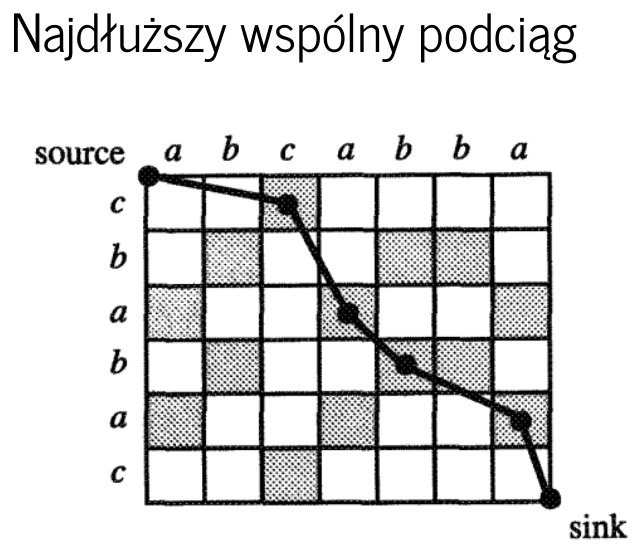

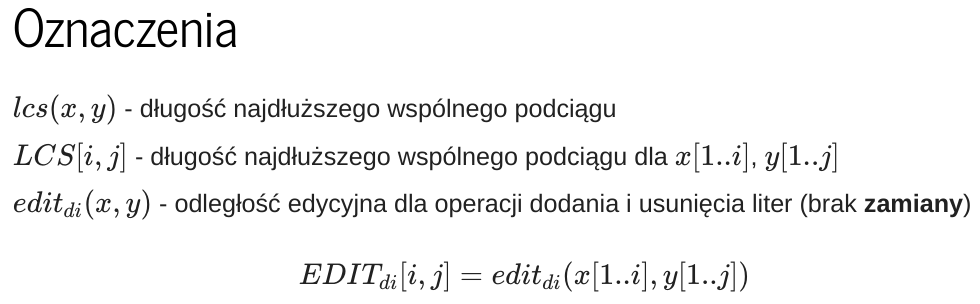

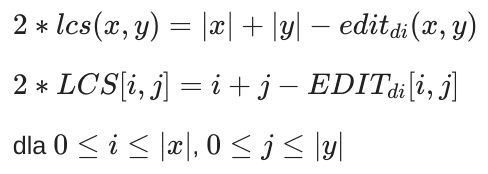

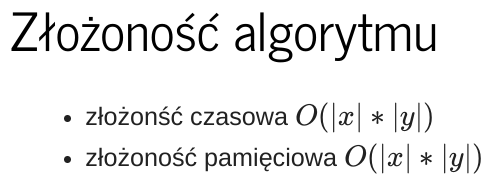

In [10]:
def delta2(a, b):
    if a == b:
        return 0
    return 2

In [11]:
def lcs(a, b):
    return (len(a) + len(b) - edit_distance(a, b, delta2)[-1][-1])/2

In [12]:
lcs('cbabac', 'abcabba')

4.0

5. Korzystając z gotowego tokenizera (np spaCy - https://spacy.io/api/tokenizer) dokonaj podziału załączonego tekstu na tokeny.

In [13]:
from spacy.tokenizer import Tokenizer
from spacy.lang.pl import Polish

nlp = Polish()
tokenizer = Tokenizer(nlp.vocab)

In [14]:
with open("romeo-i-julia-700.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [15]:
tokens = tokenizer(text)

6. Stwórz 2 wersje załączonego tekstu, w których usunięto 3% losowych tokenów.

In [16]:
def del_lines(tokens, percent=3):
    result = []
    for token in tokens:
        if np.random.random() > percent/100:
            result.append(token)
    return result

In [17]:
tokens1 = del_lines(tokens)
tokens2 = del_lines(tokens)

In [18]:
with open("text1.txt", "w", encoding="utf-8") as f:
    for token in tokens1:
        f.write(token.text_with_ws)

In [19]:
with open("text2.txt", "w", encoding="utf-8") as f:
    for token in tokens2:
        f.write(token.text_with_ws)

7. Oblicz długość najdłuższego podciągu wspólnych tokenów dla tych tekstów.

In [20]:
lcs(tokens1, tokens2)

2123.0

In [21]:
with open("text1.txt", "r", encoding="utf-8") as f:
    text1 = f.read()

In [22]:
with open("text2.txt", "r", encoding="utf-8") as f:
    text2 = f.read()

In [23]:
lcs(text1, text2)

11884.0

8. Korzystając z algorytmu z punktu 4 skonstruuj narzędzie, o działaniu podobnym do narzędzia diff, tzn. wskazującego w dwóch plikach linie, które się różnią. Na wyjściu narzędzia powinny znaleźć się elementy, które nie należą do najdłuższego wspólnego podciągu. Należy wskazać skąd dana linia pochodzi (< > - pierwszy/drugi plik) oraz numer linii w danym pliku.

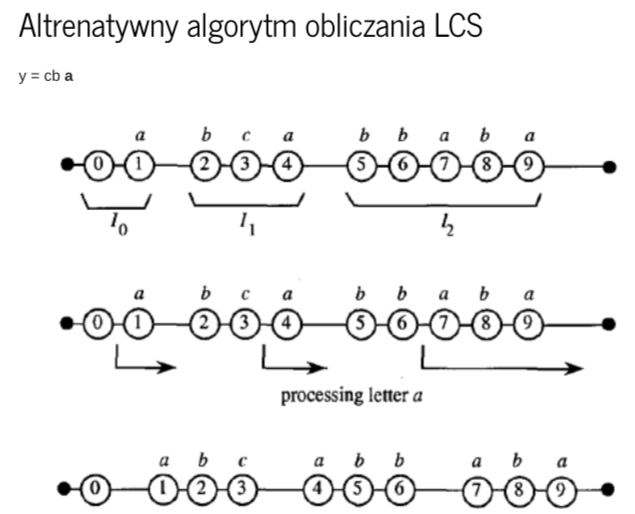

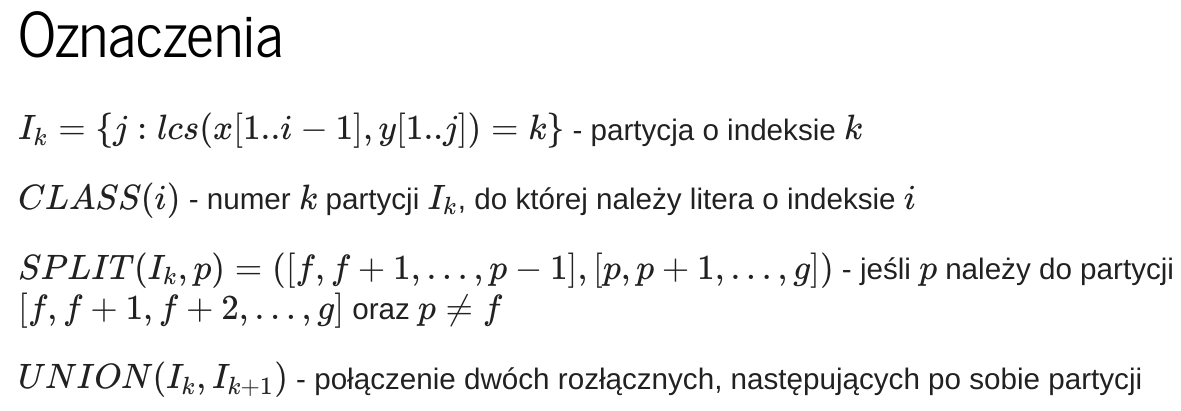

In [24]:
from bisect import bisect

In [25]:
def lcs2(x, y):
    ranges = []
    ranges.append(len(y))
    y_letters = list(y)
    for i in range(len(x)):
        positions = [j for j, l in enumerate(y_letters) if l == x[i]]
        positions.reverse()
        for p in positions:
            k = bisect(ranges, p)
            if k == bisect(ranges, p - 1):
                if k < len(ranges) - 1:
                    ranges[k] = p
                else:
                    ranges[k:k] = [p]
    return len(ranges) - 1

In [26]:
lcs2(tokens1, tokens2)

2123

In [27]:
def diff(f1, f2):
    with open(f1, "r", encoding="utf-8") as f:
        text1 = f.read()

    with open(f2, "r", encoding="utf-8") as f:
        text2 = f.read()

    text1 = text1.split('\n')
    text2 = text2.split('\n')

    edit_table = edit_distance(text1, text2, delta2)
    operations, positions = get_edit_path(text1, text2, edit_table)

    j = 0
    for i in range(len(operations)):
        oper = operations[i]
        pos = positions[i]
        if oper == "INSERT":
            print(f"> ({pos + 1}) {text1[pos]}")
            j -= 1
        elif oper == "REMOVE":
            print(f"< ({pos + j + 1}) {text2[pos + j]}")
            j += 1

9. Przedstaw wynik działania narzędzia na tekstach z punktu 6. Zwróć uwagę na dodanie znaków przejścia do nowej linii, które są usuwane w trakcie tokenizacji.

In [28]:
diff("text1.txt", "text2.txt")

> (1) William Shakespeare
< (1) Shakespeare
> (4) tłum. Józef Paszkowski
< (4) tłum. Józef 
> (11)  ESKALUS książę panujący w Weronie
< (11)  * ESKALUS — książę panujący w Weronie
> (15)  * ROMEO — syn Montekiego
< (15)  * ROMEO — syn * MERKUCJO — krewny księcia* BENWOLIO — synowiec Montekiego
< (16)  * TYBALT — krewny Pani Kapulet
< (17)  * LAURENTY — ojciec franciszkanin* JAN — brat z tegoż zgromadzenia
> (17)  * BENWOLIO — synowiec Montekiego
> (18)  * TYBALT — krewny Pani Kapulet
> (19)  * LAURENTY — ojciec franciszkanin
< (19)  * SAMSON, GRZEGORZ — Kapuleta
< (20)  * ABRAHAM — służący Montekiego
< (21)  * APTEKARZ
< (22)  * TRZECH MUZYKANTÓW
> (27)  * PIOTR
< (30) 
< (31) 
> (29)  * PANI MONTEKI — małżonka Montekiego
< (33) 
> (34) 
< (38) PROLOG
> (44) Przełożył Jan Kasprowicz
> (45) 
< (48) Pod najstraszliwszą z gwiazd, kochanków dwoje;
< (49) Po pełnym przygód nieszczęśliwych bycie
> (48) Do nowej zbrodni pchają złości dawne,
< (52) Tej ich miłości przebieg zbyt bolesny
> (52) 